In [6]:
# Linear algebra and data handling
import numpy as np
import pandas as pd

# Machine learning
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.model_selection import cross_validate, cross_val_predict, KFold
from sklearn.metrics import mean_absolute_error, median_absolute_error, classification_report
from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.svm import SVR
from sklearn.preprocessing import (StandardScaler, Normalizer, RobustScaler,
                                    MaxAbsScaler)

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
sns.set_context('talk', font_scale=1.5)
sns.set(color_codes=True)

#Extension to speed calculation (X10-100)
from sklearnex import patch_sklearn
patch_sklearn() 


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [2]:
x_train = pd.read_csv('/home/onyxia/work/aml_project/claire/final_train_train.csv')
y_train = pd.read_csv('/home/onyxia/work/aml_project/claire/Y_train.csv')['y']
x_test = pd.read_csv('/home/onyxia/work/aml_project/claire/final_train_test.csv')
y_test = pd.read_csv('/home/onyxia/work/aml_project/claire/Y_test.csv')['y']


Let's implement the best model find in run_search_model.ipynb

code for SelectKBest

In [5]:
x_train_new = SelectKBest(f_regression, k=400).fit_transform(x_train, y_train)
x_test_new = SelectKBest(f_regression, k=400).fit_transform(x_test, y_test)

code for RFE

In [3]:
from sklearnex import patch_sklearn
patch_sklearn() 

estimator = SVR(kernel="linear")
print('svr')
selector = RFE(estimator, n_features_to_select=300, step=10)
print('RFE')
selector = selector.fit(x_train, y_train)
print('fit')

X_train_selected = selector.transform(x_train)
print('train transform')
X_test_selected = selector.transform(x_test)
print('test transform')

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


svr
RFE
fit
train transform
test transform


In [22]:
regr = RandomForestRegressor(n_estimators = 100, 
                             max_depth = 20,
                             min_samples_split=2, 
                             min_samples_leaf= 1, 
                             warm_start = True, 
                             bootstrap = False,
                             max_features='log2',
                             n_jobs=-1)
regr.fit(X_train_selected, y_train)
y_train_predict= regr.predict(X_train_selected)
y_test_predict= regr.predict(X_test_selected)

In [20]:
                             
bagging_model = BaggingRegressor(base_estimator=regr, random_state=0, verbose=False,
                                 max_samples=.9, bootstrap=False, n_estimators=25)
bagging_model.fit(X_train_selected, y_train)
y_train_predict= bagging_model.predict(X_train_selected)
y_test_predict= bagging_model.predict(X_test_selected)

/opt/mamba/lib/python3.10/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


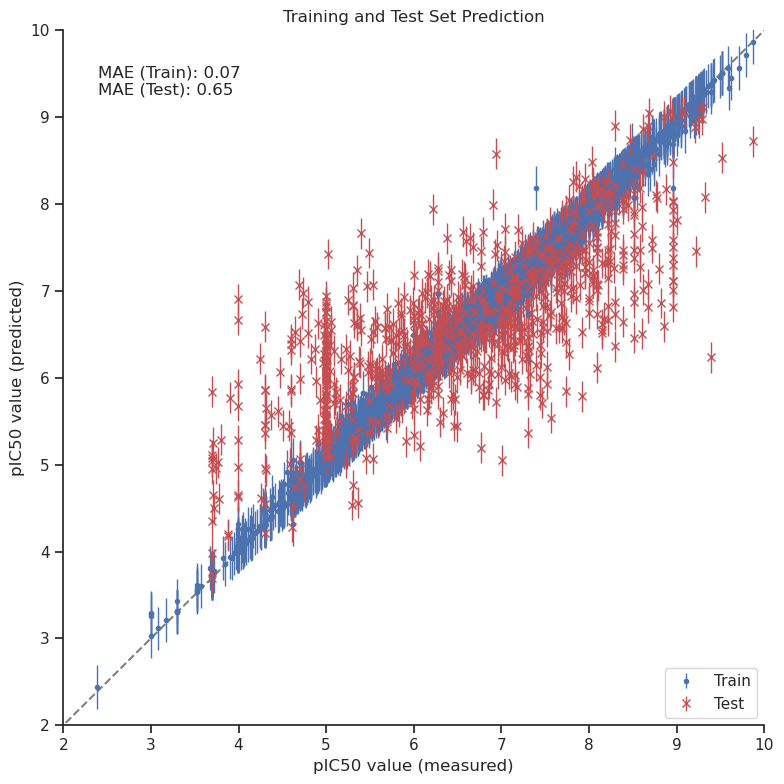

In [25]:
with sns.axes_style('ticks'):
    fig, ax = plt.subplots(figsize=(8, 8))

    ax.set_xlim([2, 10])
    ax.set_ylim([2, 10])

    ax.errorbar(y_train, y_train_predict, fmt='.', label='Train', lw=1., capsize=0, yerr=0.2*y_train_predict.std())
    ax.errorbar(y_test, y_test_predict, fmt='x', color='r', markeredgewidth=1., label='Test', lw=1., capsize=0, yerr=0.2*y_test_predict.std())

    ax.plot([-50, 110], [-50, 110], '--', zorder=0, color='gray')

    mae_train = mean_absolute_error(y_train, y_train_predict)
    mae_test = mean_absolute_error(y_test, y_test_predict)

    ax.set_title('Training and Test Set Prediction')
    ax.set_ylabel('pIC50 value (predicted)')
    ax.set_xlabel('pIC50 value (measured)')

    text = ('MAE (Train): {:.2f}'.format(mae_train) + '\n' +
            'MAE (Test): {:.2f}'.format(mae_test))

    ax.text(0.05, 0.95, text, transform=ax.transAxes, ha='left', va='top')
    
    ax.legend(loc='lower right')

    sns.despine()
    fig.tight_layout()
    
    fig.savefig('y_prediction.png', transparent=True)
